<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Univariate Analysis

### Initializations

In [1]:
# Bibliotheken einbinden
import math
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
df = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 439.7 KB


### Histograms of Number Attributes

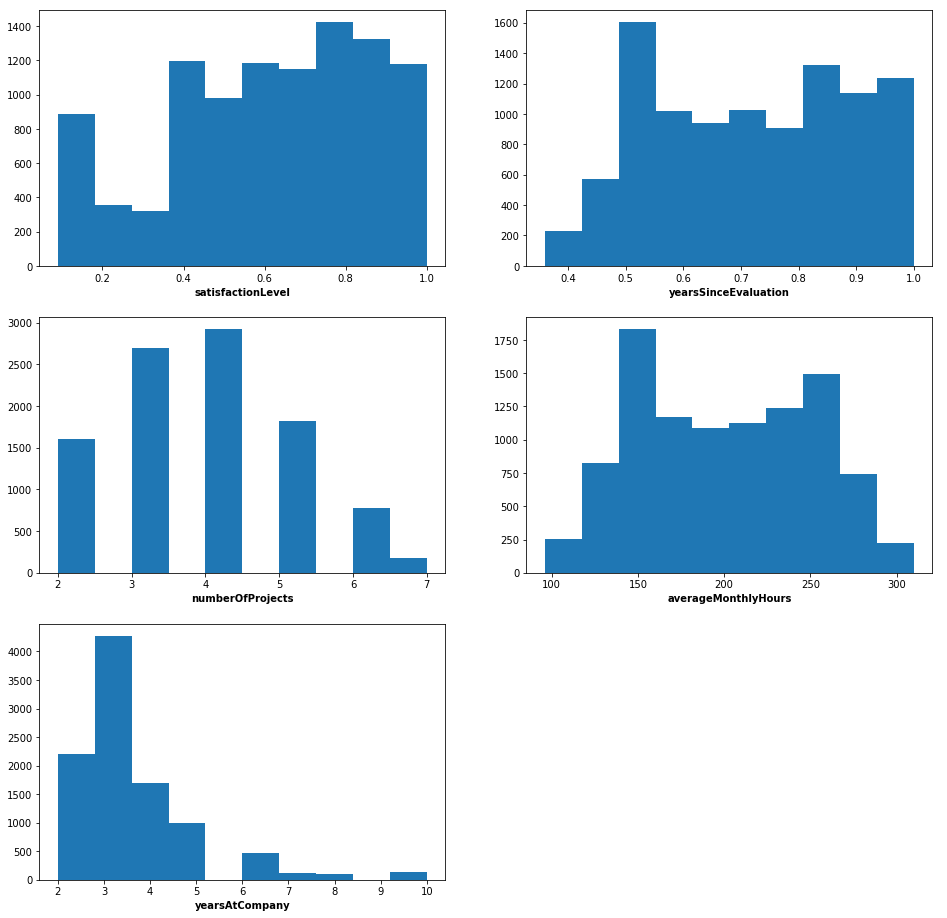

In [4]:
# Visualisierung der Häufigkeitsverteilung der Attribute mit Zahlenwerten
count_number_colums = df.select_dtypes(include=[np.number]).columns.size
f, a = plt.subplots(math.floor(count_number_colums/2) + count_number_colums%2, 2, figsize=(16,16))
a = a.ravel()
for idx, col in enumerate(df.select_dtypes(include=[np.number])):
    a[idx].hist(df[col])
    a[idx].set_xlabel(col, weight='bold')
if count_number_colums%2 == 1 :
    a[-1].axis('off')

### Countplots of Category Attributes

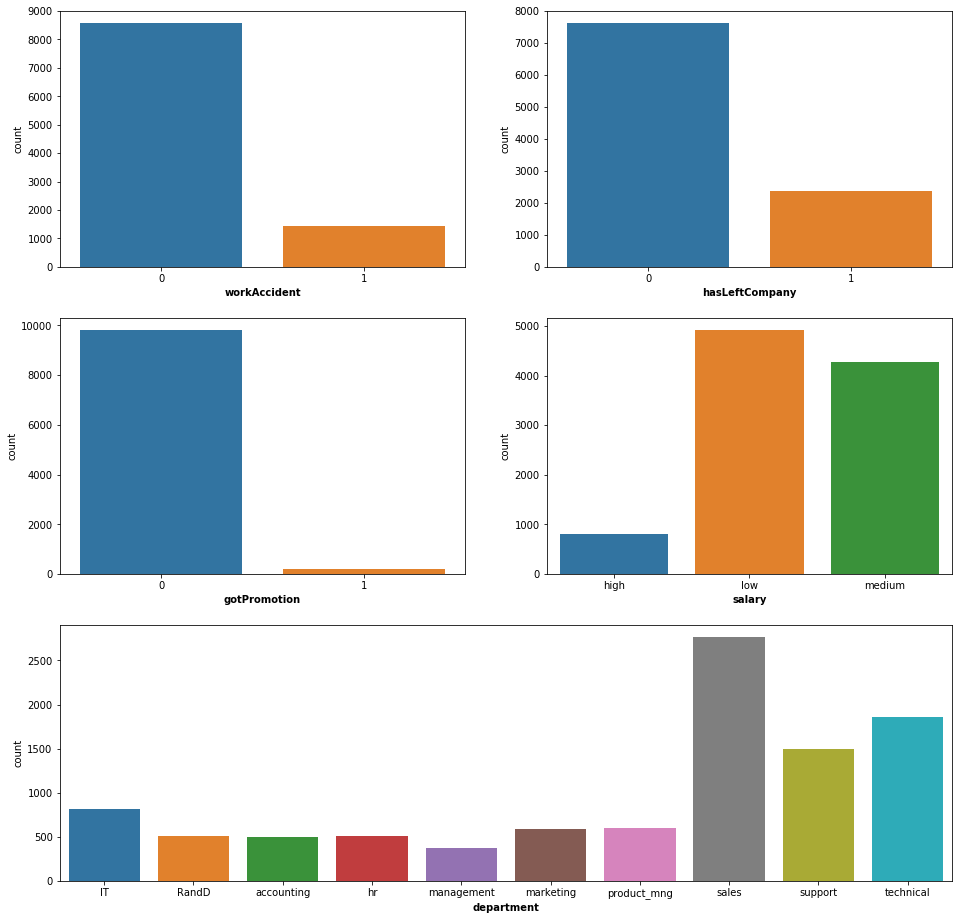

In [5]:
# Visualisierung der Häufigkeitsverteilung der Attribute mit Categories
count_number_colums = df.select_dtypes(include=['category']).columns.size
f, a = plt.subplots(math.floor(count_number_colums/2) + count_number_colums%2, 2, figsize=(16,16))
a = a.ravel()
for idx, col in enumerate(df.select_dtypes(include=['category']).drop(['department'], axis=1)):
    sns.countplot(x=col, data=df, ax=a[idx])
    a[idx].set_xlabel(col, weight='bold')
a = plt.subplot2grid((3, 2), (2, 0), colspan=2)
a.set_xlabel(col, weight='bold')
sns.countplot(x='department', data=df, ax=a);